In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

x   y
0    54   1
1    56   2
2   102  11
3     3   2
4    24  33
..  ...  ..
95    9  92
96   48  84
97   64  24
98   32  32
99   11  12

[100 rows x 2 columns]

In [4]:
x = df[['x', 'y']].values

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(x)

# Calculate Euclidean distance matrix
euclidean_dist = euclidean_distances(x)

In [7]:
x = df[['x', 'y']].values

num_clusters = 4
max_iterations = 100

# similarity metric (0 for cosine similarity, 1 for Euclidean distance)
similarity_metric = 0 

# Initialize cluster centers randomly
initial_centers = x[np.random.choice(range(len(x)), size=num_clusters, replace=False)]

# Initialize cluster labels
cluster_labels = np.zeros(len(x))

# Iterate until convergence or maximum iterations reached
for iteration in range(max_iterations):
    
    if similarity_metric == 0:
        similarity_matrix = cosine_similarity(x, initial_centers)
        
         # Assign data points to the closest cluster
        cluster_labels = np.argmax(similarity_matrix, axis=1)

    else:
        similarity_matrix = euclidean_distances(x, initial_centers)
        
         # Assign data points to the closest cluster
        cluster_labels = np.argmin(similarity_matrix, axis=1)


   
    # Update cluster centers
    updated_centers = []
    for i in range(num_clusters):
        # Find the data points assigned to the current cluster
        points_in_cluster = x[cluster_labels == i]
        # Calculate the mean of the data points along each feature (x and y)
        center = np.mean(points_in_cluster, axis=0)
        # Add the updated center to the list of cluster centers
        updated_centers.append(center)
    updated_centers = np.array(updated_centers)

    # Check for convergence
    if np.allclose(initial_centers, updated_centers):
        break

    # Update cluster centers
    initial_centers = updated_centers

# Get the final cluster centers and labels
cluster_centers = initial_centers
cluster_labels = cluster_labels


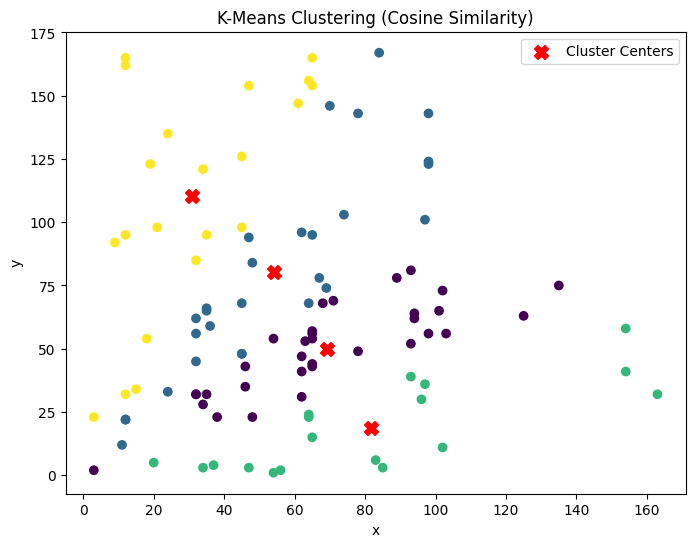

In [10]:
# Plot using cosine similarity
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.title('K-Means Clustering (Cosine Similarity)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [14]:
x = df[['x', 'y']].values

num_clusters = 4
max_iterations = 100

# similarity metric (0 for cosine similarity, 1 for Euclidean distance)
similarity_metric = 1

# Initialize cluster centers randomly
initial_centers = x[np.random.choice(range(len(x)), size=num_clusters, replace=False)]

# Initialize cluster labels
cluster_labels = np.zeros(len(x))

# Iterate until convergence or maximum iterations reached
for iteration in range(max_iterations):
    
    if similarity_metric == 0:
        similarity_matrix = cosine_similarity(x, initial_centers)
        
         # Assign data points to the closest cluster
        cluster_labels = np.argmax(similarity_matrix, axis=1)

    else:
        similarity_matrix = euclidean_distances(x, initial_centers)
        
         # Assign data points to the closest cluster
        cluster_labels = np.argmin(similarity_matrix, axis=1)


   
    # Update cluster centers
    updated_centers = []
    for i in range(num_clusters):
        # Find the data points assigned to the current cluster
        points_in_cluster = x[cluster_labels == i]
        # Calculate the mean of the data points along each feature (x and y)
        center = np.mean(points_in_cluster, axis=0)
        # Add the updated center to the list of cluster centers
        updated_centers.append(center)
    updated_centers = np.array(updated_centers)

    # Check for convergence
    if np.allclose(initial_centers, updated_centers):
        break

    # Update cluster centers
    initial_centers = updated_centers

# Get the final cluster centers and labels
cluster_centers = initial_centers
cluster_labels = cluster_labels


Text(0, 0.5, 'y')

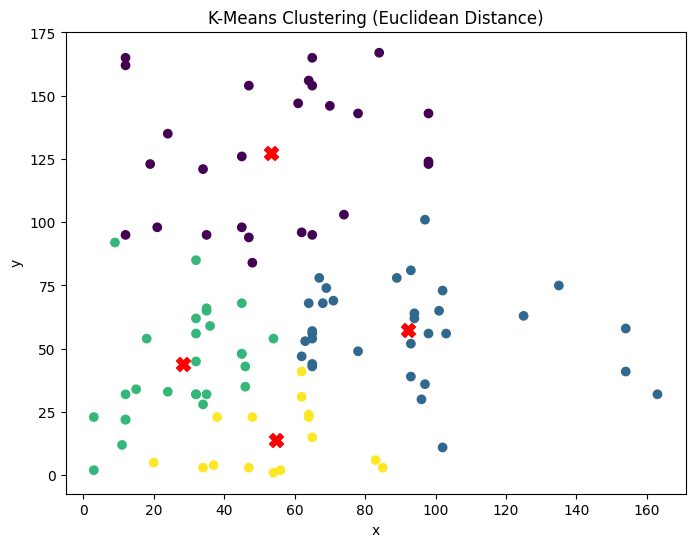

In [15]:
# Plot using Euclidean distance
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.title('K-Means Clustering (Euclidean Distance)')
plt.xlabel('x')
plt.ylabel('y')